In [1]:
import hydra
from omegaconf import OmegaConf
from glob import  glob
from rosa.predict import  predict


BASE_DIR = "/Users/nsofroniew/Documents/data/rosa/outputs/2023-01-30/15-16-37"
# BASE_DIR = "/Users/nsofroniew/Documents/data/rosa/outputs/2023-01-30/17-31-10"
config_dir = BASE_DIR + "/.hydra"

with hydra.initialize_config_dir(config_dir=config_dir):
    cfg = hydra.compose(config_name="config", overrides=OmegaConf.load(config_dir + "/overrides.yaml"))

    chkpts = BASE_DIR + "/checkpoints/*.ckpt"
    chkpt = glob(chkpts)[1]

    adata = predict(cfg, chkpt)

display(adata)

/var/folders/6n/b_zkz2ns3_l02s3g4lnlklxr0000gq/T/ipykernel_72010/2927938339.py:11: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  with hydra.initialize_config_dir(config_dir=config_dir):


RosaLightningModule(
  (model): RosaJointModel(
    (main): Sequential(
      (dual_embed): ParallelEmbed(
        (models): ModuleList(
          (0): Sequential(
            (layer_norm_0): LayerNorm((110,), eps=1e-05, elementwise_affine=True)
            (input_embed_0): InputEmbed(
              (model): Sequential(
                (projection): Linear(in_features=110, out_features=256, bias=True)
                (layer_norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
                (dropout): Dropout(p=0.5, inplace=False)
              )
            )
          )
          (1): Sequential(
            (layer_norm_1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
            (input_embed_1): InputEmbed(
              (model): Sequential(
                (projection): Linear(in_features=256, out_features=256, bias=True)
                (layer_norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
                (dropout): Dropout(p=0.5, inplace=False)
   

GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/nsofroniew/opt/anaconda3/envs/multiomics/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1789: UserWarning: MPS available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='mps', devices=1)`.
  rank_zero_warn(
Missing logger folder: /Users/nsofroniew/Documents/GitHub/rosa/notebooks/lightning_logs
/Users/nsofroniew/opt/anaconda3/envs/multiomics/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:236: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 10 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

AnnData object with n_obs × n_vars = 177 × 19429
    obs: 'cell_type', 'count', 'tissue', 'label', 'train', 'marker_gene', 'marker_feature_name'
    var: 'soma_joinid', 'feature_name', 'feature_length', 'external_gene_name', 'gene_biotype', 'column_1', 'column_2', 'column_3', 'column_4', 'train', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'dendrogram_label', 'embedding_pca', 'hvg', 'log1p'
    obsm: 'bin_edges', 'embedding'
    varm: 'embedding', 'embedding_pca'
    layers: 'binned', 'counts', 'log1p', 'normalized_counts', 'prediction'

In [2]:
from rosa.score import score_predictions
from rosa.plotting import plot_expression_and_correlation, plot_marker_gene_heatmap


adata_test, results = score_predictions(adata)

/Users/nsofroniew/opt/anaconda3/envs/multiomics/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))



        mean spearmanr across genes 0.701
        mean spearmanr across cells 0.407
        mean square error 0.568
        ks-statistic on total expression 0.313
        mean percent total expression captured per cell 33.807
        


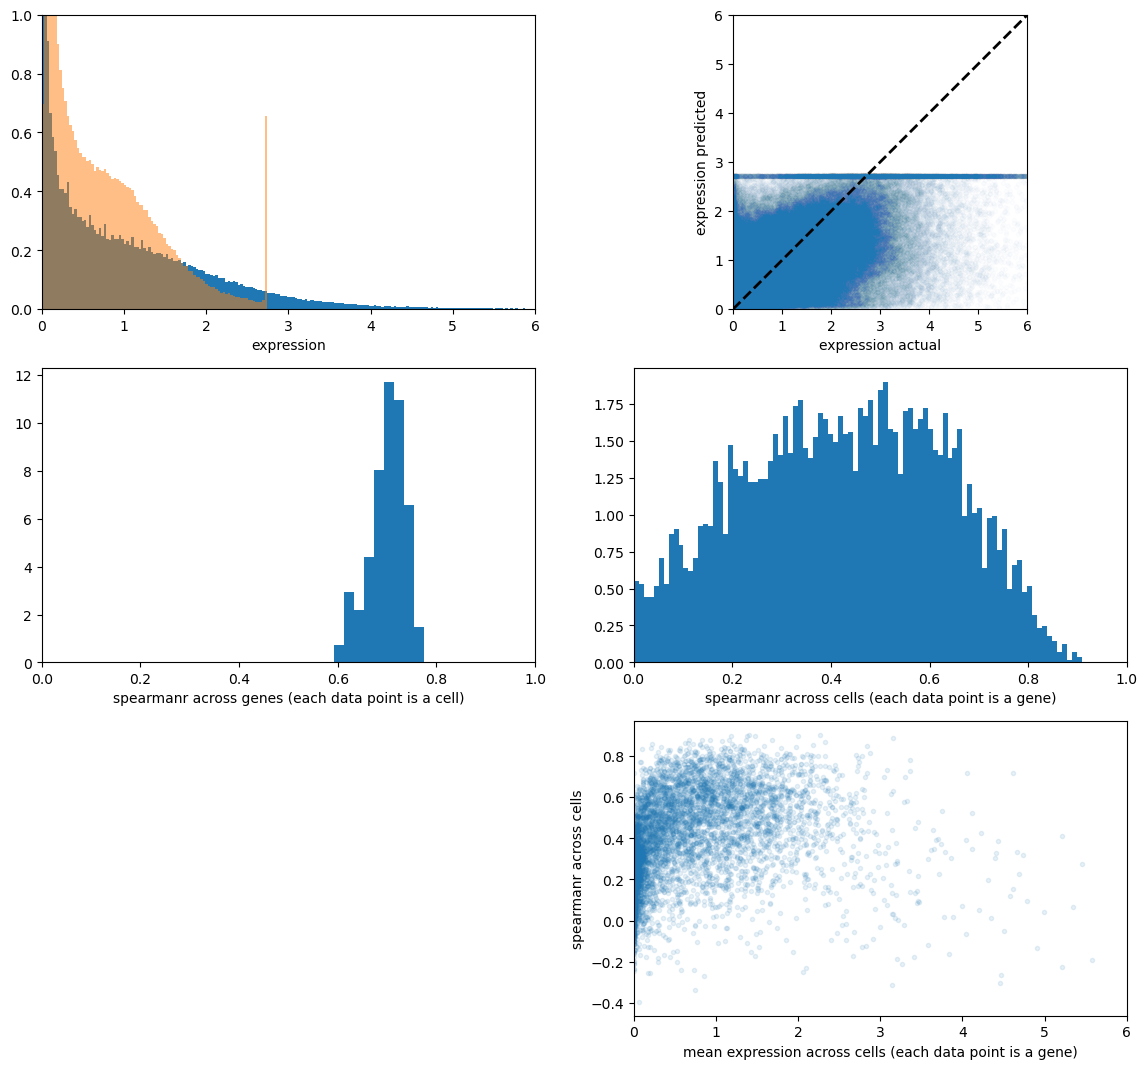

In [3]:
plot_expression_and_correlation(adata_test, results)

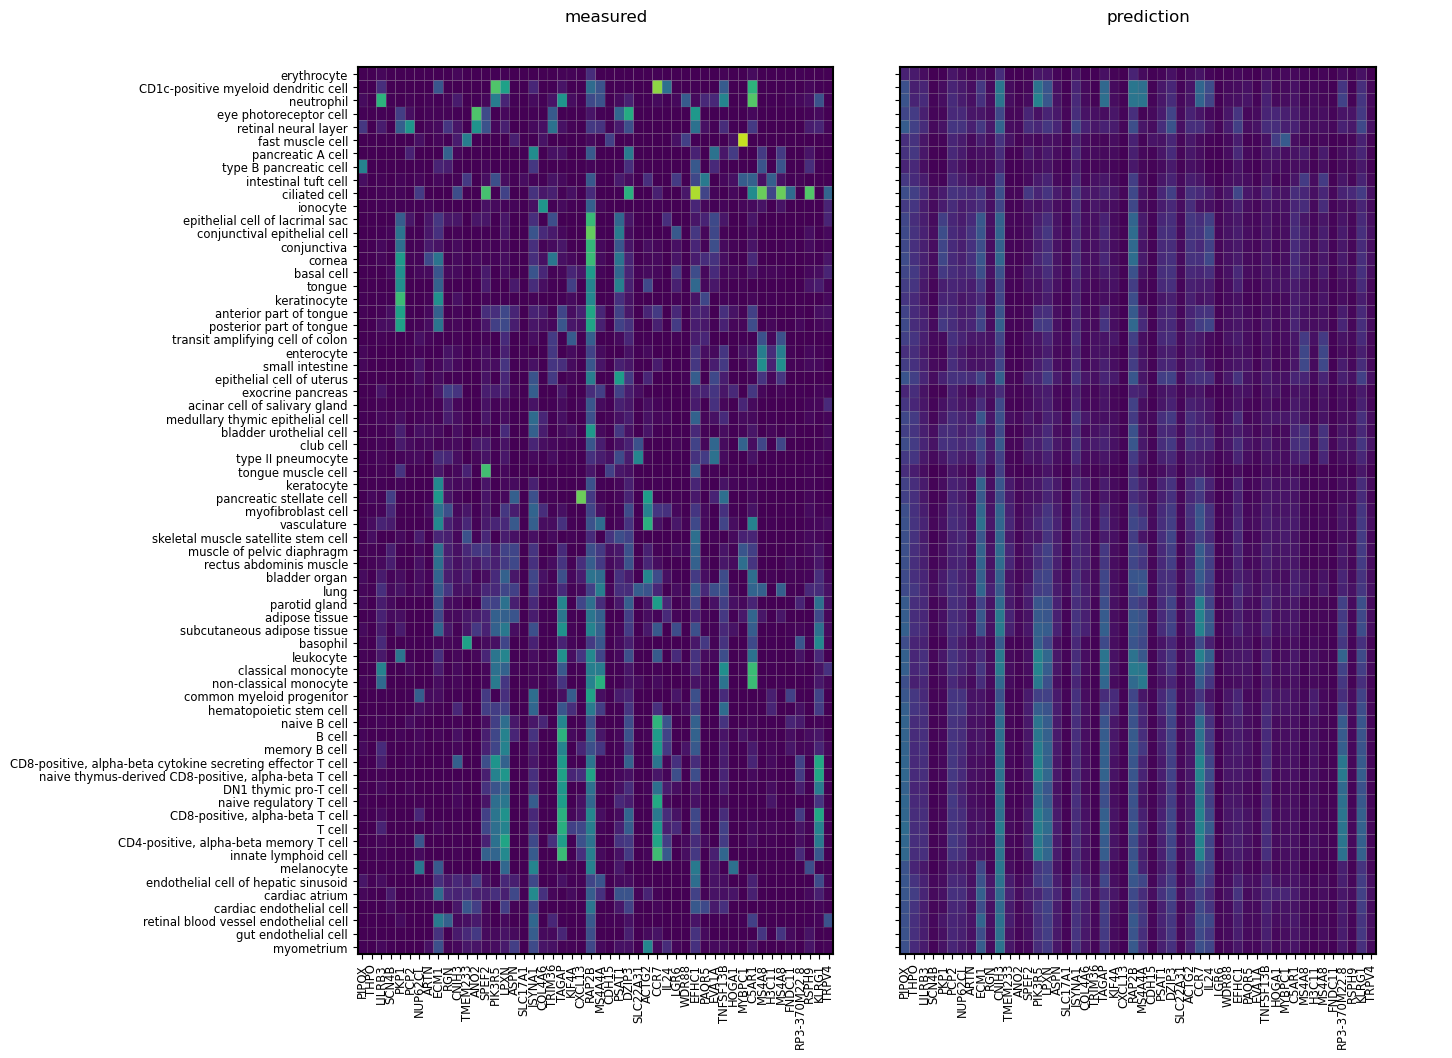

In [4]:
import numpy as np


marker_genes = adata_test.var[adata_test.var['highly_variable']]['feature_name'].values
np.random.seed(42)
marker_genes = np.random.choice(marker_genes, 50)

plot_marker_gene_heatmap(adata_test, marker_genes)

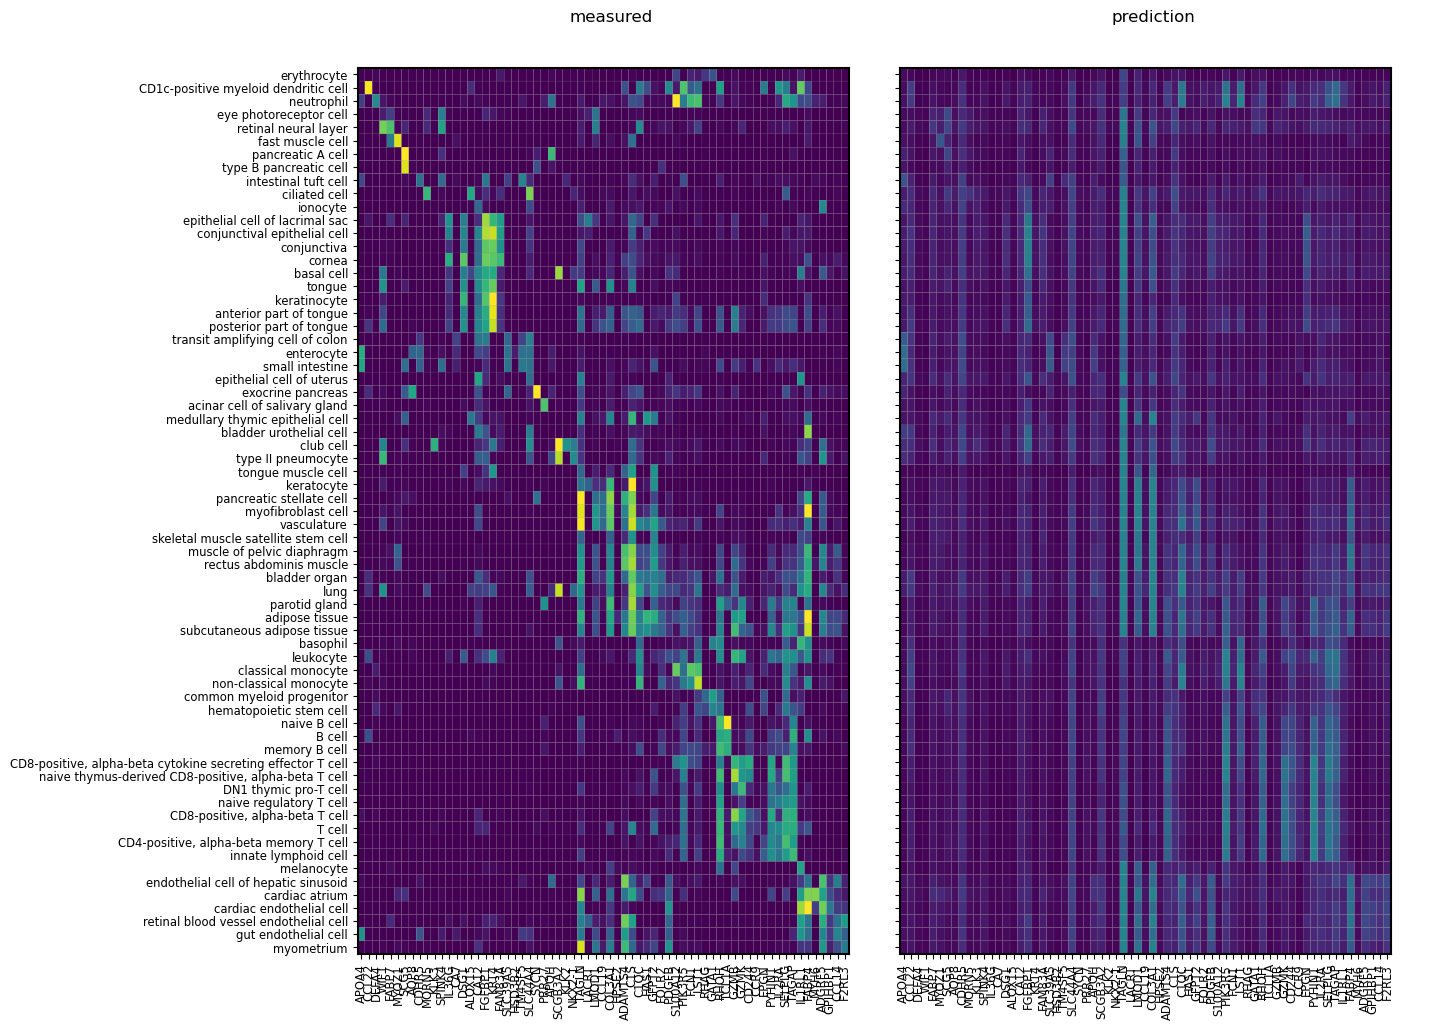

In [5]:
marker_genes_dict = adata_test.obs.set_index('label').to_dict()['marker_feature_name']
plot_marker_gene_heatmap(adata_test, marker_genes_dict)

In [6]:
adata_test.layers['prediction'][:, 2]

array([1.3704808 , 1.0487207 , 1.411691  , 1.3480997 , 1.4342017 ,
       1.3297123 , 1.4048623 , 0.6585758 , 0.8937933 , 1.3019776 ,
       1.3949225 , 1.3592895 , 1.2725794 , 1.1651529 , 1.4804329 ,
       1.3212655 , 1.0047588 , 1.2658231 , 1.3067704 , 1.0961825 ,
       1.2971101 , 1.3299835 , 1.3243278 , 1.1709595 , 1.1544095 ,
       1.1273953 , 1.6520454 , 1.2775487 , 1.2402484 , 1.3866583 ,
       1.1107816 , 1.1503413 , 1.2304211 , 1.2269924 , 1.2374322 ,
       1.4136537 , 1.0196251 , 1.6529996 , 0.9666889 , 1.3880117 ,
       1.528291  , 0.95918816, 1.3485196 , 1.1363573 , 1.1604135 ,
       0.8911044 , 1.183709  , 0.76895976, 1.026921  , 1.5137699 ,
       1.3928648 , 1.3586768 , 1.2367771 , 0.95491236, 1.1931721 ,
       1.2863765 , 1.3581711 , 1.2242848 , 1.4650402 , 1.215241  ,
       1.2055777 , 1.1440823 , 1.0847983 , 1.3994344 , 1.1085646 ,
       1.3591927 , 1.3527329 ], dtype=float32)

In [7]:
adata_test.layers

Layers with keys: binned, counts, log1p, normalized_counts, prediction